In [3]:
!pip install nvcc4jupyter

In [4]:
%load_ext nvcc4jupyter

Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmp0pzqxekr".


In [49]:
%%time
%%cuda
#include <iostream>
#include <vector>
#include<sstream>
void sieve(int N){
    bool isPrime[N+1];
    for (int i=0;i<=N;++i){
        isPrime[i]=true;
    }
    isPrime[0]= false;
    isPrime[1]=false;
    for(int i=2;i*i<=N;++i){
        if(isPrime[i]==true){
            for(int j=i*i;j<=N;j+=i)
              isPrime[j]=false;
        }
    }
    //std::cout << "Prime numbers within the interval [1, " << N << "] are:" << std::endl;
    //for (int p = 2; p <= N; ++p) {
       // if (isPrime[p])
            // std::cout << p << " ";
    // }
 }

int main() {
    int n=10000;
    std::cin >> n;
    sieve(n);
    return 0;
}


CPU times: user 11.5 ms, sys: 785 µs, total: 12.3 ms
Wall time: 1.96 s


In [48]:
%%time
%%cuda
#include <iostream>
#include <vector>
#include<sstream>
__global__ void sieve(bool *isPrime, int N) {
    int i = blockIdx.x * blockDim.x + threadIdx.x + 2;
    if (i <= N && isPrime[i]) {
        for (int j = i * i; j <= N; j += i) {
            isPrime[j] = false;
        }
    }
}

void printPrimes(bool *isPrime, int N) {
    std::cout << "Prime numbers within the interval [1, " << N << "] are:" << std::endl;
    for (int p = 2; p <= N; ++p) {
        if (isPrime[p])
            std::cout << p << " ";
    }
}

void sieve_CUDA(int N) {
    bool *isPrime;
    cudaMallocManaged(&isPrime, (N + 1) * sizeof(bool));

    for (int i = 0; i <= N; ++i) {
        isPrime[i] = true;
    }
    isPrime[0] = false;
    isPrime[1] = false;

    int threadsPerBlock = 256;
    int blocksPerGrid = (N + threadsPerBlock - 1) / threadsPerBlock;

    sieve<<<blocksPerGrid, threadsPerBlock>>>(isPrime, N);
    cudaDeviceSynchronize();

    // printPrimes(isPrime, N);

    cudaFree(isPrime);
}

int main() {
    int n = 10000;
    std::cin >> n;
    sieve_CUDA(n);
    return 0;
}




CPU times: user 9 ms, sys: 4.65 ms, total: 13.6 ms
Wall time: 2.48 s


Enter x-coordinate for Point 1 of Line 1: 4
Enter y-coordinate for Point 1 of Line 1: 1.96
Enter x-coordinate for Point 2 of Line 1: 5
Enter y-coordinate for Point 2 of Line 1: 1.95
Enter x-coordinate for Point 3 of Line 1: 6
Enter y-coordinate for Point 3 of Line 1: 2.47
Enter x-coordinate for Point 4 of Line 1: 7
Enter y-coordinate for Point 4 of Line 1: 2.38
Enter x-coordinate for Point 5 of Line 1: 8
Enter y-coordinate for Point 5 of Line 1: 1.81
Enter x-coordinate for Point 6 of Line 1: 9
Enter y-coordinate for Point 6 of Line 1: 2.03
Enter x-coordinate for Point 1 of Line 2: 4
Enter y-coordinate for Point 1 of Line 2: 2.48
Enter x-coordinate for Point 2 of Line 2: 5
Enter y-coordinate for Point 2 of Line 2: 2.02
Enter x-coordinate for Point 3 of Line 2: 6
Enter y-coordinate for Point 3 of Line 2: 2.42
Enter x-coordinate for Point 4 of Line 2: 7
Enter y-coordinate for Point 4 of Line 2: 2.57
Enter x-coordinate for Point 5 of Line 2: 8
Enter y-coordinate for Point 5 of Line 2: 2.27

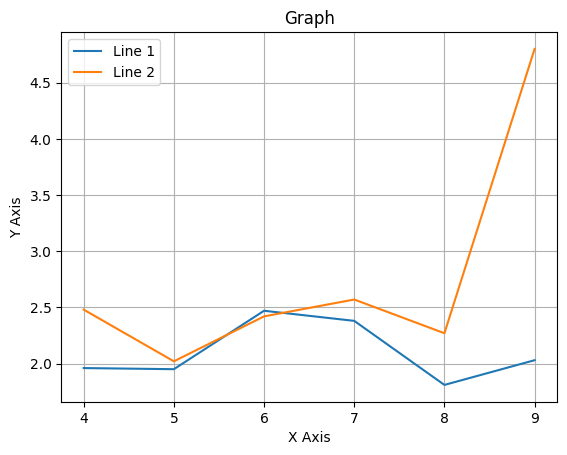

In [52]:
import matplotlib.pyplot as plt

def plot_graph(x1, y1, x2, y2):
    plt.plot(x1, y1, label='Line 1')
    plt.plot(x2, y2, label='Line 2')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Graph')
    plt.legend()
    plt.grid(True)
    plt.show()

def get_points(line_num):
    points = []
    for i in range(6):
        x = float(input(f"Enter x-coordinate for Point {i+1} of Line {line_num}: "))
        y = float(input(f"Enter y-coordinate for Point {i+1} of Line {line_num}: "))
        points.append((x, y))
    return zip(*points)

def main():
    x1, y1 = get_points(1)
    x2, y2 = get_points(2)
    plot_graph(x1, y1, x2, y2)

if __name__ == "__main__":
    main()


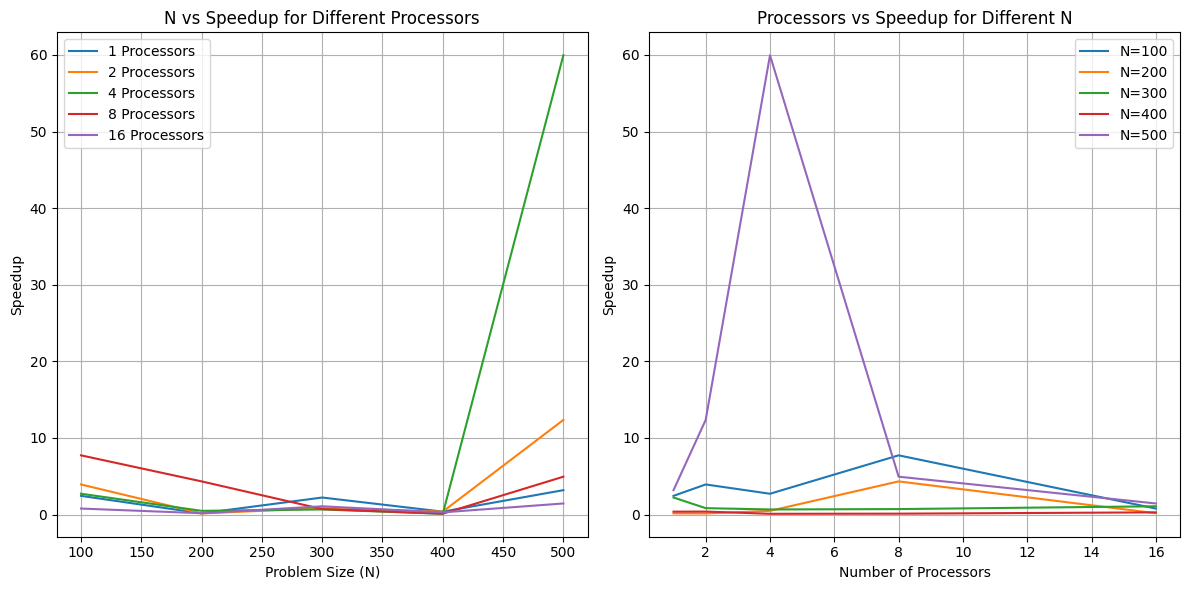

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Function to calculate speedup
def calculate_speedup(seq_time, par_time):
    return seq_time / par_time

# Function to calculate parallel efficiency
def calculate_parallel_efficiency(speedup, num_processors):
    return speedup / num_processors

# Generate random data for N and num_processors
N_values = [100, 200, 300, 400, 500]
num_processors_values = [1, 2, 4, 8, 16]

# Generate random execution times for sequential and parallel algorithms
seq_execution_times = np.random.rand(len(N_values))
par_execution_times = np.random.rand(len(N_values), len(num_processors_values))

# Calculate speedup for each N and num_processors combination
speedup_values = np.zeros((len(N_values), len(num_processors_values)))
for i in range(len(N_values)):
    for j in range(len(num_processors_values)):
        speedup_values[i][j] = calculate_speedup(seq_execution_times[i], par_execution_times[i][j])

# Calculate parallel efficiency for each N and num_processors combination
parallel_efficiency_values = np.zeros((len(N_values), len(num_processors_values)))
for i in range(len(N_values)):
    for j in range(len(num_processors_values)):
        parallel_efficiency_values[i][j] = calculate_parallel_efficiency(speedup_values[i][j], num_processors_values[j])

# Plotting
plt.figure(figsize=(12, 6))

# Graph 1: N vs Speedup for different num_processors
plt.subplot(1, 2, 1)
for j in range(len(num_processors_values)):
    plt.plot(N_values, speedup_values[:, j], label=f"{num_processors_values[j]} Processors")
plt.xlabel('Problem Size (N)')
plt.ylabel('Speedup')
plt.title('N vs Speedup for Different Processors')
plt.legend()
plt.grid(True)

# Graph 2: num_processors vs Speedup for different N
plt.subplot(1, 2, 2)
for i in range(len(N_values)):
    plt.plot(num_processors_values, speedup_values[i, :], label=f"N={N_values[i]}")
plt.xlabel('Number of Processors')
plt.ylabel('Speedup')
plt.title('Processors vs Speedup for Different N')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
#Problem Description:
##Given size N,every prime number within the range of 1,N is to be generated and parallelised

In [7]:
##approach:
#Using sieve's algorithm to find prime number by
#1.initialising an array with size n and making the boolean values as true
#2.find all the factors for i range(1,n/2),if divisible ,change the boolean value of i to false
#3.the numbers which have true values at the end are displayed as prime numbers